# Introducing CNNS with TensorFlow


In this notebook, we're going to see how we can use ```TensorFlow``` to build convolutional neural networks to work with colour image data.

## Load libraries

In [2]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

2024-03-22 15:16:09.855410: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


__Define plotting function__

In [3]:
def plot_history(H, epochs):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

__Load cifar10 data__

We first want to load the ```cifar-10``` dataset, normalize the values, and then binarize the labels.

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


**Question:** As an experiment, see what happens if you try to train the model with un-scaled images. Does it affect performance?

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
# create one-hot encodings
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

We'll also manually create a list of labels for when we come to print the classification report later.

In [7]:
# initialize label names for CIFAR-10 dataset
label_names = ["airplane", "automobile", 
              "bird", "cat", 
              "deer", "dog", 
              "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

We're going to begin by creating one of the simplest CNN architectures with only a single convolutional layer. This type of architecture is known as the ShallowNet architecture:
>INPUT => CONV => ReLU => FC

In [23]:
#initalise model
model = Sequential()

# define CONV => ReLU
model.add(Conv2D(32, 
                (3,3),
                padding = "same",
                input_shape = (32, 32, 3)))
model.add(Activation("swish"))
          
# FC classifier
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("swish"))
model.add(Dense(10))
model.add(Activation("softmax"))

/home/ucloud/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


__Compile model__

We then compile our model using some of the same arguments we've already seen in different contexts.

In [24]:
sgd = SGD(learning_rate =.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,196,618 (16.01 MB)

 Trainable params: 4,196,618 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

__Train model__

Finally, we train the model on the data and get our predictions.

In [26]:
H = model.fit(X_train, y_train,
              validation_split=0.1,
              batch_size=32,
              epochs=10,
              verbose=1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1620 - loss: 2.2394 - val_accuracy: 0.2912 - val_loss: 2.0208
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3067 - loss: 1.9700 - val_accuracy: 0.3380 - val_loss: 1.9037
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3516 - loss: 1.8665 - val_accuracy: 0.3536 - val_loss: 1.8642
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3693 - loss: 1.8215 - val_accuracy: 0.3230 - val_loss: 1.8706
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3789 - loss: 1.7976 - val_accuracy: 0.3446 - val_loss: 1.8428
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3911 - loss: 1.7597 - val_accuracy: 0.3718 - val_loss: 1.8043
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3980 - loss: 1.7397 - val_accuracy: 0.3848 - val_loss: 1.7752
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4068 -

__Evaluate model__

In [27]:
predictions = model.predict(X_test, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [28]:
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.46      0.51      0.48      1000
  automobile       0.47      0.54      0.50      1000
        bird       0.21      0.61      0.31      1000
         cat       0.41      0.05      0.10      1000
        deer       0.40      0.24      0.30      1000
         dog       0.39      0.34      0.36      1000
        frog       0.46      0.43      0.44      1000
       horse       0.56      0.34      0.42      1000
        ship       0.59      0.45      0.51      1000
       truck       0.50      0.45      0.48      1000

    accuracy                           0.40     10000
   macro avg       0.45      0.40      0.39     10000
weighted avg       0.45      0.40      0.39     10000



We can also use the ```plot_history()``` function available from ```TensorFlow``` to see how our model performs during training.

These plots can tell us *a lot* about whether a model is under- or over-fiting the data. You read more at [this fantastic blog post](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/). 

Other useful blogs are [here](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html) and there's a good video overview [here](https://youtu.be/p3CcfIjycBA).

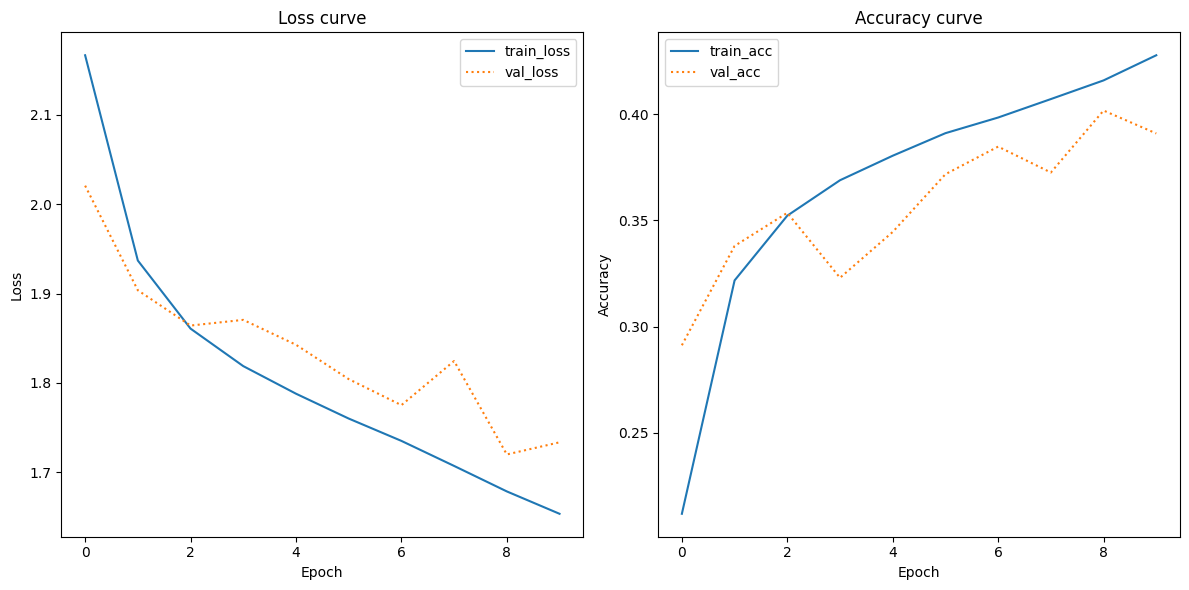

In [29]:
plot_history(H, 10)

## LeNet

Next, we'll look at a slightly more complicated CNN architecture, known as ```LeNet``` after its creator Yann LeCun, who is now Chief AI Scientist at Meta. You can read more [here](https://en.wikipedia.org/wiki/LeNet).
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [16]:
# define model
model = Sequential()

# first set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(32, (3,3),
                 padding="same",
                 input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# second set of layers CONV => RELU => MAXPOOLs
model.add(Conv2D(50, (5,5),
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

/home/ucloud/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: The `padding` argument must be a list/tuple or one of {'valid', 'same'}. Received: zero

__Compile model__

In [ ]:
sgd = SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [ ]:
model.summary()

__Train model__

In [ ]:
# train model
H = model.fit(X_train, y_train,
              validation_split=0.1, 
              batch_size=32,
              epochs=20,
              verbose=1)

In [ ]:
plot_history(H,20)

In [ ]:
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))